# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.048487e+01     8.017024e+00
 * time: 0.0050811767578125
     1     2.551883e+01     3.559592e+00
 * time: 0.016355037689208984
     2     1.958327e+01     5.582286e+00
 * time: 0.04162907600402832
     3     1.624121e+01     4.631169e+00
 * time: 0.06540417671203613
     4     1.238898e+01     1.508781e+00
 * time: 0.08911800384521484
     5     1.087660e+01     8.260479e-01
 * time: 0.11283707618713379
     6     1.044047e+01     1.121120e+00
 * time: 0.1309070587158203
     7     9.969384e+00     6.376296e-01
 * time: 0.14920401573181152
     8     9.717484e+00     5.929673e-01
 * time: 0.16791200637817383
     9     9.670172e+00     1.092770e+00
 * time: 0.1875460147857666
    10     9.524643e+00     7.230147e-01
 * time: 0.20820212364196777
    11     9.327290e+00     5.934786e-01
 * time: 0.22777199745178223
    12     9.171909e+00     9.334941e-01
 * time: 0.2421741485595703
    13     9.154455e+00     5.995261e-01
 * time: 0.

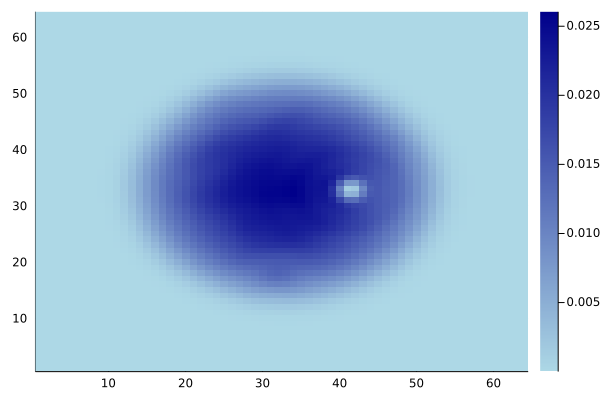

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)